# IMPORTING PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mat

# LOADING DATASET

In [49]:
data=pd.read_csv("creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


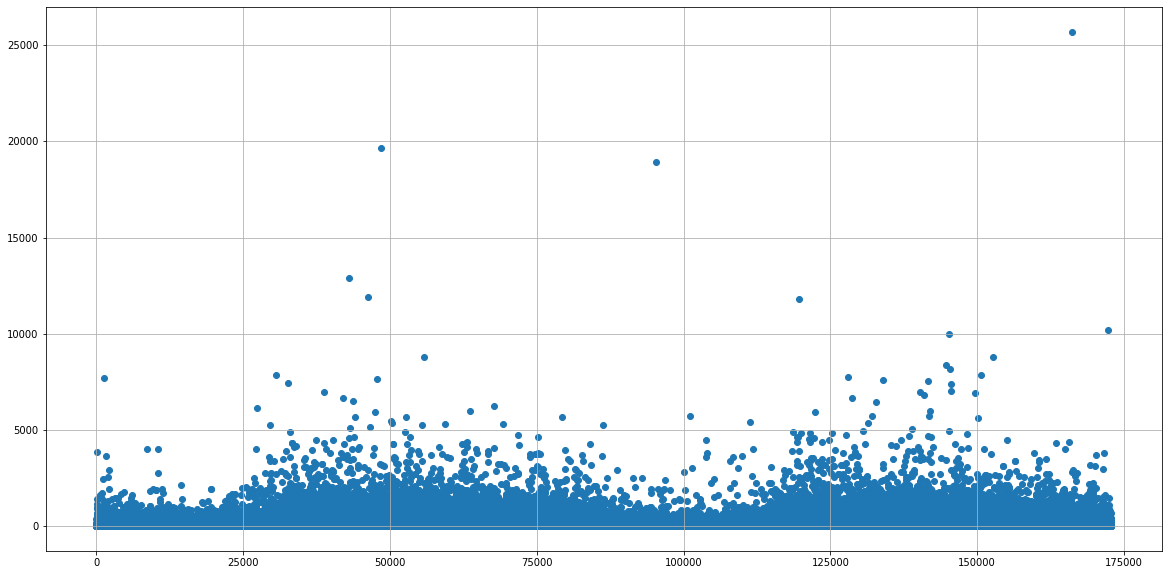

In [3]:
mat.figure(figsize=(20,10))
mat.scatter(data.Time,data.Amount)
mat.grid()
mat.show()

# CLUSTERING OF DATA

## KMEANS CLUSTERING

In [50]:
from sklearn.cluster import KMeans
km=KMeans(n_clusters=2)
y_pred=km.fit_predict(data.loc[:,"Time":"V28"])
y_pred

array([1, 1, 1, ..., 0, 0, 0])

In [51]:
data["KMeans"]=y_pred

In [19]:
df0=data[data["KMeans"]==0]
df1=data[data["KMeans"]==1]


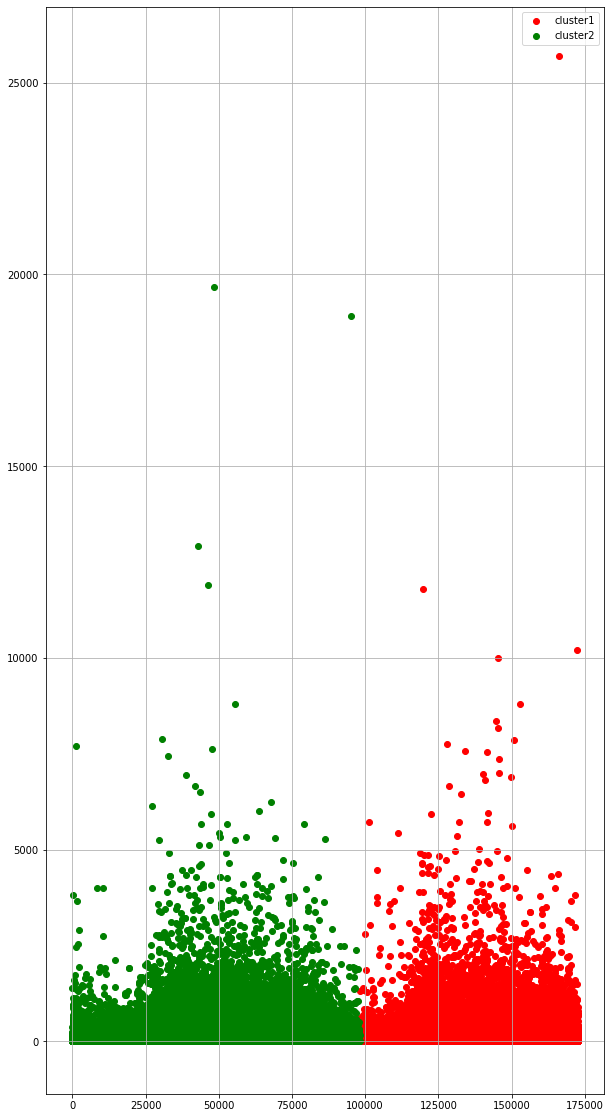

In [20]:
mat.figure(figsize=(10,20))
mat.scatter(df0["Time"],df0["Amount"],color="red",label="cluster1")
mat.scatter(df1["Time"],df1["Amount"],color="green",label="cluster2")
mat.grid()
mat.legend()
mat.show()

### ELBOW METHOD For Calculatinng ideal Value of K

In [14]:
k_range=range(1,10)
sse=[]
for i in k_range:
    km=KMeans(n_clusters=i)
    km.fit_predict(data.loc[:,"Time":"V28"])
    sse.append(km.inertia_)
print(sse)

[642272856463032.4, 118302273328075.56, 62984828364061.54, 35661242940911.484, 23666198072608.918, 17418046213691.69, 11857681135501.896, 9433935826373.844, 7492807617776.37]


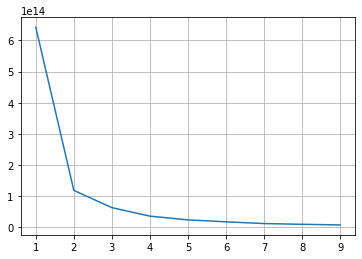

In [16]:
mat.plot(k_range,sse)
mat.grid()
mat.show()

# Support Vector Classifier

In [6]:
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,KMeans
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,1
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,1


## Determining dependent and independent variables

In [7]:
x=data.loc[:,"Time":"V28"]
y=data.KMeans

## division of data into test and train data

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

## Generating model using train data

In [10]:
from sklearn.svm import SVC
model=SVC(C=1)
model.fit(x_train,y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

## Output and Accuracy on train data

In [11]:
from sklearn.metrics import accuracy_score


In [12]:
ytrain_pred=model.predict(x_train)
ac=accuracy_score(y_train,ytrain_pred)
print(ac)

0.9978464923573886


## Output on Test data

In [13]:
ytest_pred=model.predict(x_test)


In [14]:
ytest_pred

array([0, 0, 0, ..., 1, 0, 1])

## Confusion Matrix and Accuracy score on test data

In [15]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,ytest_pred)
cm

array([[32624,   223],
       [   98, 38257]], dtype=int64)

In [17]:
accuracy=accuracy_score(y_test,ytest_pred)
accuracy

0.9954916996713575

# NAIVE BAYES MODEL

In [19]:
from sklearn.naive_bayes import GaussianNB

## Training Model on train data

In [53]:
model=GaussianNB()
model.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

## Applying Model on Test data

In [54]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

## Confusion Matrix and Accuracy score on test data

In [55]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[31784,  1063],
       [  253, 38102]], dtype=int64)

In [56]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.981517373107497

# LOGISTIC REGRESSION

## Training model using train data

In [57]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [58]:
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Applying Model on Test data

In [59]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 1, 0, 1])

## Confusion matrix and accuracy score

In [60]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[32795,    52],
       [    4, 38351]], dtype=int64)

In [61]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9992135052386169

In [32]:
model.coef_

array([[-2.91289305e+01,  1.00770980e-01, -2.32791021e-02,
        -9.91060050e-02, -1.12593884e-01,  2.61896143e-02,
        -5.60081548e-02, -1.03464588e-03,  1.66353686e-02,
         4.90572095e-03,  4.31478087e-02, -1.08171989e-01,
         2.23890331e-01, -1.41905298e-01, -1.30627932e-01,
        -1.08740628e-01,  2.16102775e-02, -1.41443617e-01,
         2.63518098e-02,  1.20763051e-01,  1.09503163e-01,
         6.21951423e-02,  9.18272254e-02,  9.97809660e-03,
         2.57652919e-02,  4.16672695e-02,  1.49789445e-01,
        -4.03643291e-02, -4.65109125e-03]])